In [1]:
import pandas as pd
import seaborn as sns

news_articles = pd.read_csv('Op-Ed Sentiments - Sheet1 (24).csv') 
sympathy_scores = pd.read_csv('Sympathy Scores - Sheet1 (5).csv')
word_counts = pd.read_csv('Sheet 1-Updated_Op_Ed_Sentiments (1).csv')

In [2]:
news_articles.head(15)

,Article Link,Article,Polarity,Subjectivity,Source,Date,Author
0,https://www.nytimes.com/2023/11/10/opinion/isr...,I landed in Israel and went straight to a fune...,NaN,NaN,NYTimes,11/10/2023,Stephens
1,https://www.nytimes.com/2023/11/10/opinion/isr...,Israeli military operations have created an un...,NaN,NaN,NYTimes,11/10/2023,Guest
2,https://www.nytimes.com/2023/11/09/opinion/isr...,People warned me before I came to Tel Aviv a f...,NaN,NaN,NYTimes,11/9/2023,Friedman
3,https://www.nytimes.com/2023/11/08/opinion/isr...,My columns from Israel and the West Bank over ...,NaN,NaN,NYTimes,11/8/2023,Kristof
4,https://www.nytimes.com/2023/11/08/opinion/bid...,The Hamas terrorist attacks on Israel and Isra...,NaN,NaN,NYTimes,11/8/2023,Edsall
5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,NaN,NaN,NYTimes,10/7/2023,Friedman
6,https://www.nytimes.com/2023/11/02/opinion/isr...,"On Oct. 25, Professor Nurit Peled-Elhanan, a l...",NaN,NaN,NYTimes,11/2/2023,Sfard
7,https://www.nytimes.com/2023/11/01/opinion/isr...,One reason I’m afraid that the worst is yet to...,NaN,NaN,NYTimes,11/1/2023,Kristof
8,https://www.nytimes.com/2023/11/03/opinion/gaz...,"Four weeks ago, Israel began its military camp...",NaN,NaN,NYTimes,11/3/2023,Editorial Board
9,https://www.nytimes.com/2023/11/03/opinion/isa...,Nothing is harder right now for many readers —...,NaN,NaN,NYTimes,11/3/2023,Kingsbury


In [3]:
sympathy_scores.head()

,Article Link,SS (Human),SS (GPT),SS (Claude),Final Score
0,https://www.nytimes.com/2023/11/10/opinion/isr...,-0.80,-0.8,-0.80,-0.80
1,https://www.nytimes.com/2023/11/10/opinion/isr...,NaN,0.8,0.70,0.75
2,https://www.nytimes.com/2023/11/09/opinion/isr...,-0.50,-0.2,-0.65,-0.50
3,https://www.nytimes.com/2023/11/08/opinion/isr...,NaN,0.0,0.20,0.10
4,https://www.nytimes.com/2023/11/08/opinion/bid...,-0.35,-0.4,0.00,-0.35


In [4]:
word_counts.head()

,Article Link,Stance (human),Stance (Chat),Stance (Claude),Article,Polarity,Subjectivity,Words,Source,Date,Author
0,https://www.nytimes.com/2023/11/10/opinion/isr...,-0.8,-0.8,NaN,I landed in Israel and went straight to a fune...,NaN,NaN,1275,NYTimes,11/10,2673
1,https://www.nytimes.com/2023/11/10/opinion/isr...,NaN,NaN,NaN,Israeli military operations have created an un...,NaN,NaN,1444,NYTimes,11/10,Guest
2,https://www.nytimes.com/2023/11/09/opinion/isr...,NaN,NaN,NaN,People warned me before I came to Tel Aviv a f...,NaN,NaN,2412,NYTimes,11/9,Friedman
3,https://www.nytimes.com/2023/11/08/opinion/isr...,NaN,NaN,NaN,My columns from Israel and the West Bank over ...,NaN,NaN,1064,NYTimes,11/8,Kristof
4,https://www.nytimes.com/2023/11/08/opinion/bid...,NaN,NaN,NaN,The Hamas terrorist attacks on Israel and Isra...,NaN,NaN,2673,NYTimes,11/8,Edsall


In [5]:
from textblob import TextBlob

polarity = []
subjectivity = []

for index, row in news_articles.iterrows():
    if pd.notna(row['Article']):  # Assuming 'Article' is the column with text
        # Perform sentiment analysis
        analysis = TextBlob(row['Article'])
        # Append the results to the lists
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    else:
        # Handle NaN value (e.g., append None or a default value)
        polarity.append(None)
        subjectivity.append(None)

# Add the lists as new columns to the DataFrame
news_articles['Polarity'] = polarity
news_articles['Subjectivity'] = subjectivity

# Save the updated DataFrame to a new CSV file
news_articles.to_csv('updated_news_articles.csv', index=False)



In [6]:
news_articles.head(10)

,Article Link,Article,Polarity,Subjectivity,Source,Date,Author
0,https://www.nytimes.com/2023/11/10/opinion/isr...,I landed in Israel and went straight to a fune...,0.035205,0.389367,NYTimes,11/10/2023,Stephens
1,https://www.nytimes.com/2023/11/10/opinion/isr...,Israeli military operations have created an un...,0.039283,0.404822,NYTimes,11/10/2023,Guest
2,https://www.nytimes.com/2023/11/09/opinion/isr...,People warned me before I came to Tel Aviv a f...,0.074738,0.395492,NYTimes,11/9/2023,Friedman
3,https://www.nytimes.com/2023/11/08/opinion/isr...,My columns from Israel and the West Bank over ...,-0.005551,0.435986,NYTimes,11/8/2023,Kristof
4,https://www.nytimes.com/2023/11/08/opinion/bid...,The Hamas terrorist attacks on Israel and Isra...,0.064684,0.426913,NYTimes,11/8/2023,Edsall
5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,10/7/2023,Friedman
6,https://www.nytimes.com/2023/11/02/opinion/isr...,"On Oct. 25, Professor Nurit Peled-Elhanan, a l...",0.026491,0.420227,NYTimes,11/2/2023,Sfard
7,https://www.nytimes.com/2023/11/01/opinion/isr...,One reason I’m afraid that the worst is yet to...,-0.015374,0.466326,NYTimes,11/1/2023,Kristof
8,https://www.nytimes.com/2023/11/03/opinion/gaz...,"Four weeks ago, Israel began its military camp...",0.051719,0.436402,NYTimes,11/3/2023,Editorial Board
9,https://www.nytimes.com/2023/11/03/opinion/isa...,Nothing is harder right now for many readers —...,0.041475,0.372837,NYTimes,11/3/2023,Kingsbury


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/chrislele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
for index in range(1, 125):
    article = news_articles.loc[index, 'Article']
    if pd.notna(article):
        # Perform sentiment analysis
        analysis = TextBlob(article)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity

        # Assign values to the DataFrame
        news_articles.loc[index, 'Polarity'] = polarity
        news_articles.loc[index, 'Subjectivity'] = subjectivity

        # Print the results
        print(f'Article {index} - Polarity: {polarity}, Subjectivity: {subjectivity}')
    else:
        # Handle NaN value
        news_articles.loc[index, 'Polarity'] = None
        news_articles.loc[index, 'Subjectivity'] = None
        print(f'Article {index} - No content available for analysis.')

Article 1 - Polarity: 0.03928348028118671, Subjectivity: 0.40482197466142444
Article 2 - Polarity: 0.07473835795846666, Subjectivity: 0.39549238503042855
Article 3 - Polarity: -0.005551482567611586, Subjectivity: 0.43598601219568967
Article 4 - Polarity: 0.06468385150203329, Subjectivity: 0.42691304276531544
Article 5 - Polarity: 0.030784761585866547, Subjectivity: 0.4787882774070618
Article 6 - Polarity: 0.026490909090909096, Subjectivity: 0.42022683982684006
Article 7 - Polarity: -0.015373977873977873, Subjectivity: 0.4663258038258037
Article 8 - Polarity: 0.05171940735321017, Subjectivity: 0.4364017437961099
Article 9 - Polarity: 0.04147465437788018, Subjectivity: 0.372836661546339
Article 10 - Polarity: 0.043849990589121056, Subjectivity: 0.46101909362778926
Article 11 - Polarity: 0.0033461514844493607, Subjectivity: 0.4388122515782093
Article 12 - Polarity: 0.0784525449298177, Subjectivity: 0.42217220910402725
Article 13 - Polarity: 0.035373158587444296, Subjectivity: 0.4412607234

KeyError: 124

In [9]:
news_articles = news_articles.drop_duplicates(subset=['Article Link'])
sympathy_scores = sympathy_scores.drop_duplicates(subset=['Article Link'])

In [10]:
merged_df = news_articles.merge(sympathy_scores[['Article Link', 'SS (Human)', 'SS (GPT)', 'SS (Claude)', 'Final Score']],
                               left_on='Article Link', right_on='Article Link', how='left')

In [11]:
finished_df = pd.merge(merged_df, word_counts[['Article', 'Words']], on='Article', how='left')

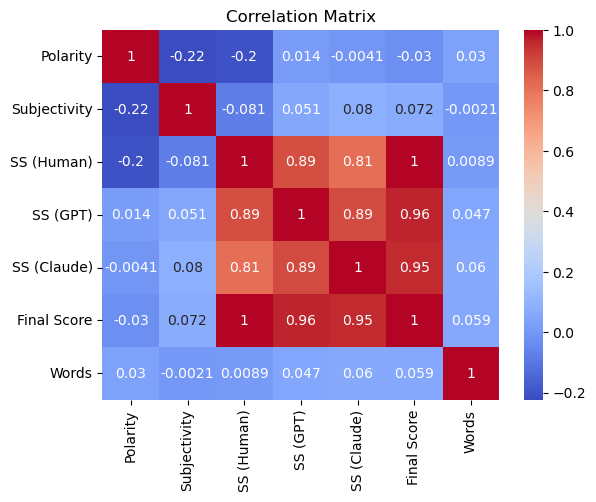

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'merged_df'
# Calculate the correlation matrix
correlation_matrix = finished_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
finished_df.reset_index(inplace=True)

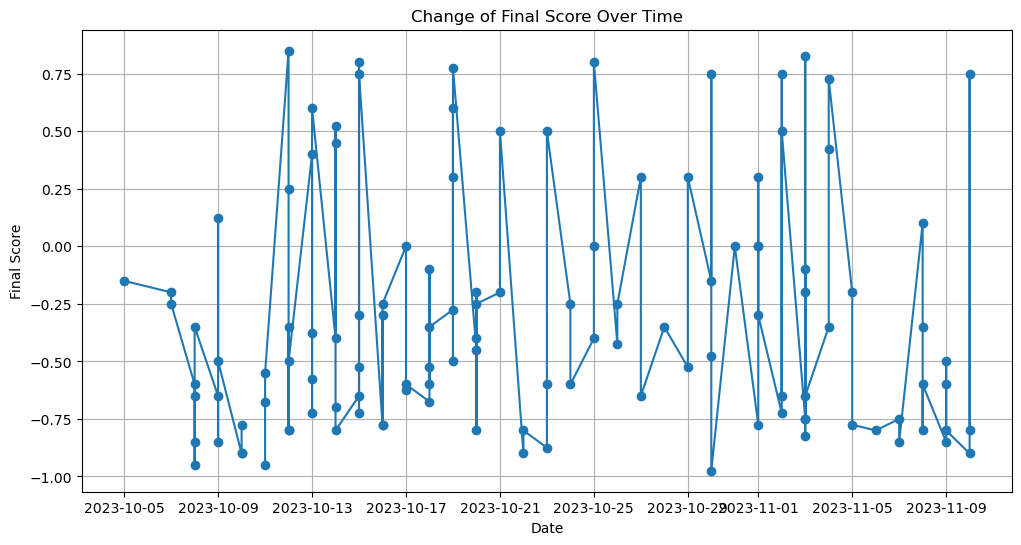

In [14]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')  # adjust the format as per your data

# Sort the dataframe by 'Date'
finished_df.sort_values('Date', inplace=True)

# Plotting 'Final Score' over time
plt.figure(figsize=(12, 6))
plt.plot(finished_df['Date'], finished_df['Final Score'], marker='o')
plt.title('Change of Final Score Over Time')
plt.xlabel('Date')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()

In [15]:
finished_df.head(10)

,index,Article Link,Article,Polarity,Subjectivity,Source,Date,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words
121,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,2023-10-05,Ravid,NaN,-0.20,-0.1,-0.15,522.0
5,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,2023-10-07,Friedman,-0.20,-0.70,-0.2,-0.20,1977.0
51,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,2023-10-07,Stephens,NaN,-0.20,-0.3,-0.25,NaN
71,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,2023-10-08,Ghitis,-0.60,-0.75,-0.8,-0.60,NaN
119,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,2023-10-08,Kontorovich,NaN,-0.90,-0.8,-0.85,917.0
120,120,https://www.wsj.com/articles/israel-faces-its-...,"Historical analogies are always tricky, but it...",0.009317,0.565459,WSJ,2023-10-08,Troy,-0.95,-0.90,-0.5,-0.95,NaN
118,118,https://www.wsj.com/articles/israels-opportuni...,Hamas’s surprise attack is a humanitarian horr...,0.101326,0.471174,WSJ,2023-10-08,Pipes,NaN,-0.60,-0.7,-0.65,573.0
52,52,https://www.nytimes.com/2023/10/08/opinion/int...,Saturday will be remembered as one of the most...,0.068129,0.404965,NYTimes,2023-10-08,Meir,NaN,-0.50,-0.2,-0.35,NaN
53,53,https://www.nytimes.com/2023/10/09/opinion/isr...,The brutal terrorist attack on Israel by Hamas...,-0.028837,0.475650,NYTimes,2023-10-09,Editorial Board,NaN,-0.70,-0.6,-0.65,NaN
117,117,https://www.wsj.com/articles/mitch-mcconnell-f...,As hundreds of Iranian-backed terrorists storm...,0.091917,0.480043,WSJ,2023-10-09,McConnel,NaN,-0.90,-0.8,-0.85,679.0


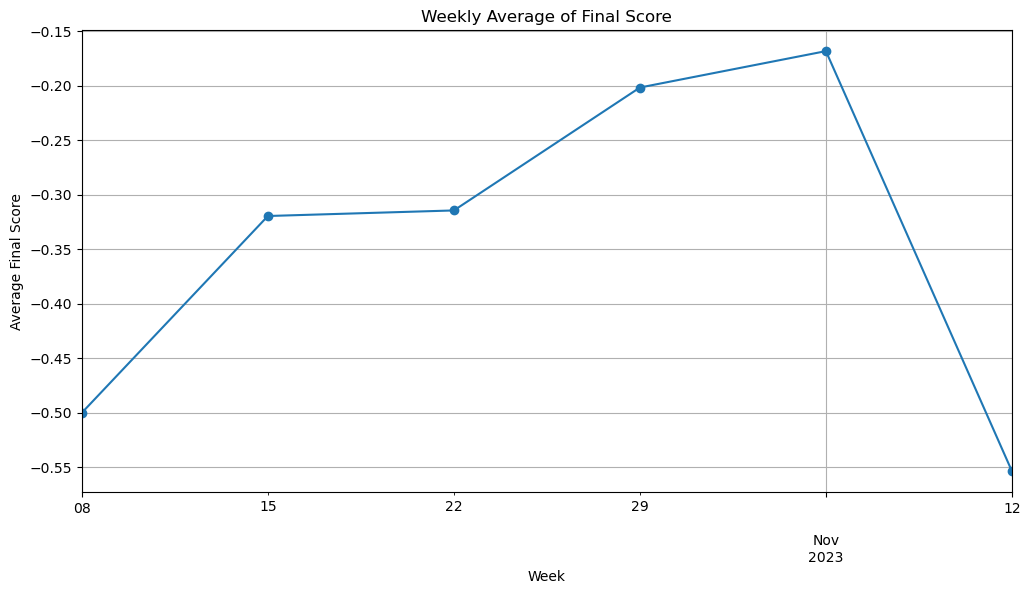

In [16]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')
finished_df.set_index('Date', inplace=True)

# Group by week and calculate the mean 'Final Score'
weekly_scores = finished_df['Final Score'].resample('W').mean()

# Plotting weekly average 'Final Score'
plt.figure(figsize=(12, 6))
weekly_scores.plot(marker='o', linestyle='-')
plt.title('Weekly Average of Final Score')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.grid(True)
plt.show()

In [17]:
finished_df.reset_index(inplace=True)

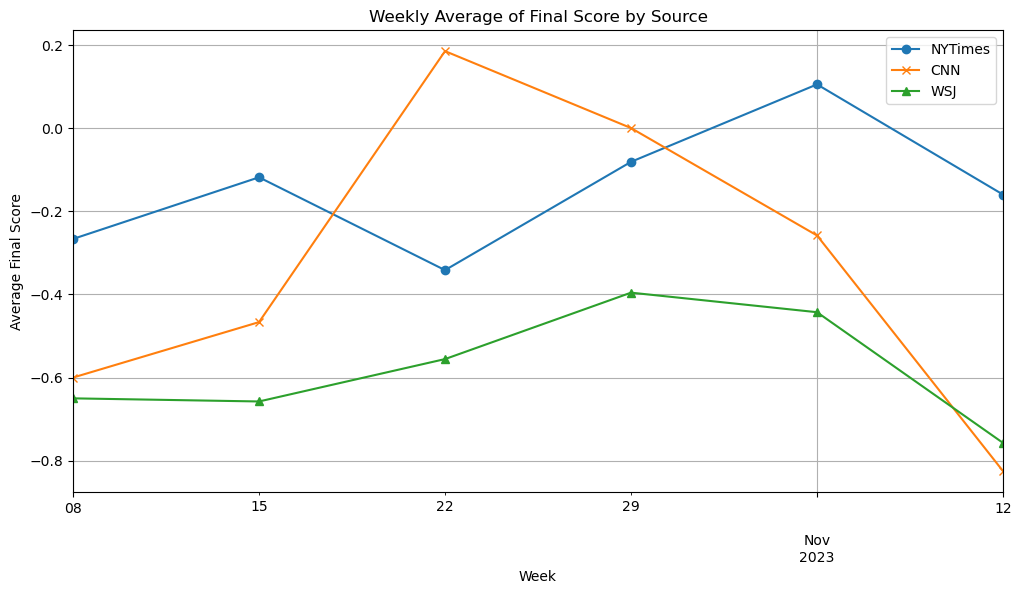

In [18]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')
finished_df.set_index('Date', inplace=True)

# Filter dataframes by source
nytimes_df = finished_df[finished_df['Source'] == 'NYTimes']
cnn_df = finished_df[finished_df['Source'] == 'CNN']
wsj_df = finished_df[finished_df['Source'] == 'WSJ']

# Group by week and calculate mean for each source
weekly_nytimes = nytimes_df['Final Score'].resample('W').mean()
weekly_cnn = cnn_df['Final Score'].resample('W').mean()
weekly_wsj = wsj_df['Final Score'].resample('W').mean()

# Plotting weekly averages for each source
plt.figure(figsize=(12, 6))
weekly_nytimes.plot(marker='o', linestyle='-', label='NYTimes')
weekly_cnn.plot(marker='x', linestyle='-', label='CNN')
weekly_wsj.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
finished_df.reset_index(inplace=True)

In [20]:
finished_df.head(10)

,Date,index,Article Link,Article,Polarity,Subjectivity,Source,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words
0,2023-10-05,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,Ravid,NaN,-0.20,-0.1,-0.15,522.0
1,2023-10-07,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,Friedman,-0.20,-0.70,-0.2,-0.20,1977.0
2,2023-10-07,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,Stephens,NaN,-0.20,-0.3,-0.25,NaN
3,2023-10-08,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,Ghitis,-0.60,-0.75,-0.8,-0.60,NaN
4,2023-10-08,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,Kontorovich,NaN,-0.90,-0.8,-0.85,917.0
5,2023-10-08,120,https://www.wsj.com/articles/israel-faces-its-...,"Historical analogies are always tricky, but it...",0.009317,0.565459,WSJ,Troy,-0.95,-0.90,-0.5,-0.95,NaN
6,2023-10-08,118,https://www.wsj.com/articles/israels-opportuni...,Hamas’s surprise attack is a humanitarian horr...,0.101326,0.471174,WSJ,Pipes,NaN,-0.60,-0.7,-0.65,573.0
7,2023-10-08,52,https://www.nytimes.com/2023/10/08/opinion/int...,Saturday will be remembered as one of the most...,0.068129,0.404965,NYTimes,Meir,NaN,-0.50,-0.2,-0.35,NaN
8,2023-10-09,53,https://www.nytimes.com/2023/10/09/opinion/isr...,The brutal terrorist attack on Israel by Hamas...,-0.028837,0.475650,NYTimes,Editorial Board,NaN,-0.70,-0.6,-0.65,NaN
9,2023-10-09,117,https://www.wsj.com/articles/mitch-mcconnell-f...,As hundreds of Iranian-backed terrorists storm...,0.091917,0.480043,WSJ,McConnel,NaN,-0.90,-0.8,-0.85,679.0


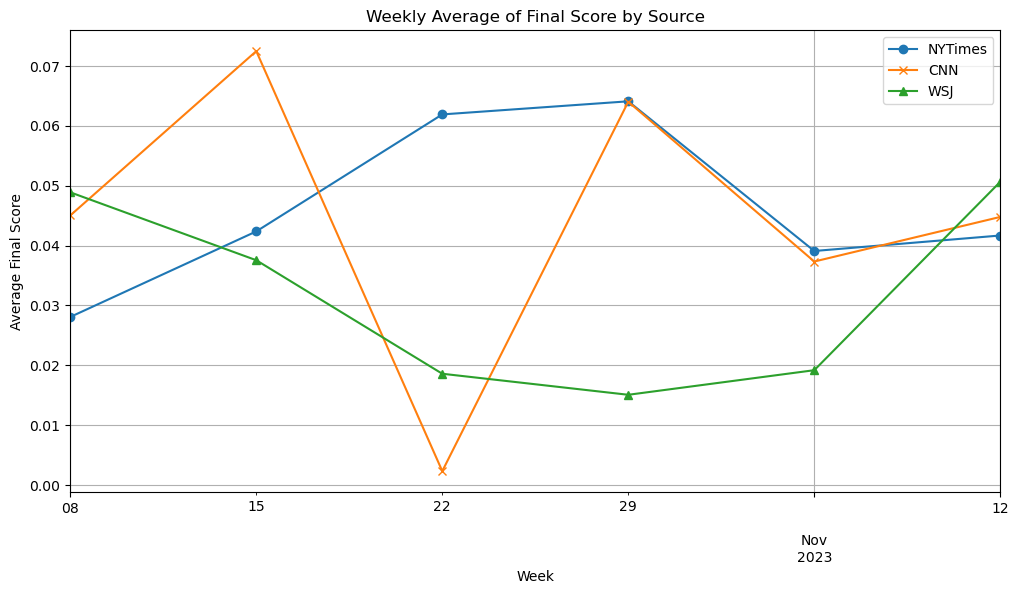

In [21]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# Filter dataframes by source and resample without setting 'Date' as index
nytimes_scores = finished_df[finished_df['Source'] == 'NYTimes'].resample('W', on='Date')['Polarity'].mean()
cnn_scores = finished_df[finished_df['Source'] == 'CNN'].resample('W', on='Date')['Polarity'].mean()
wsj_scores = finished_df[finished_df['Source'] == 'WSJ'].resample('W', on='Date')['Polarity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
nytimes_scores.plot(marker='o', linestyle='-', label='NYTimes')
cnn_scores.plot(marker='x', linestyle='-', label='CNN')
wsj_scores.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

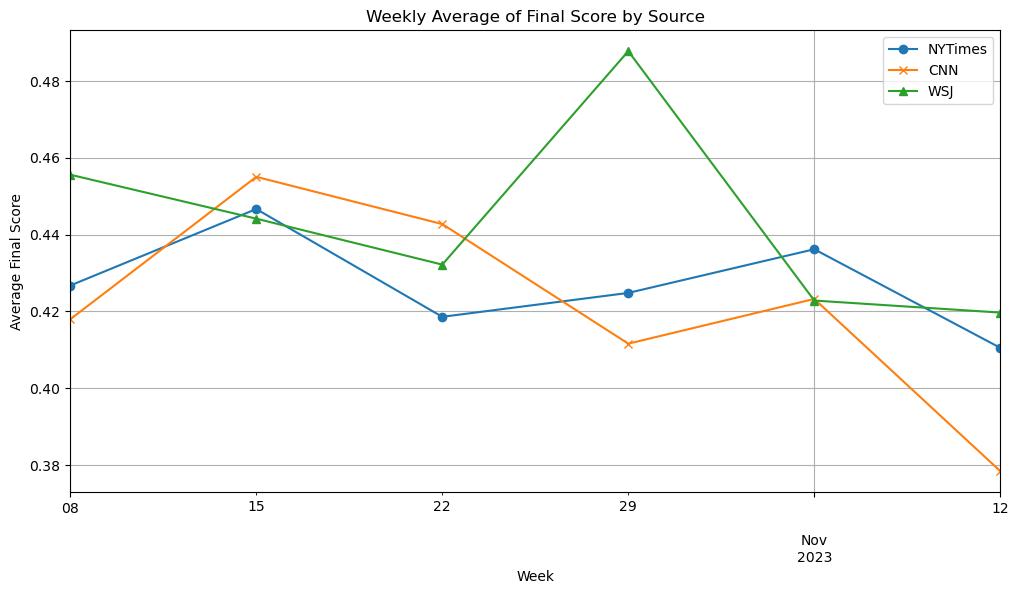

In [22]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# Filter dataframes by source and resample without setting 'Date' as index
nytimes_scores = finished_df[finished_df['Source'] == 'NYTimes'].resample('W', on='Date')['Subjectivity'].mean()
cnn_scores = finished_df[finished_df['Source'] == 'CNN'].resample('W', on='Date')['Subjectivity'].mean()
wsj_scores = finished_df[finished_df['Source'] == 'WSJ'].resample('W', on='Date')['Subjectivity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
nytimes_scores.plot(marker='o', linestyle='-', label='NYTimes')
cnn_scores.plot(marker='x', linestyle='-', label='CNN')
wsj_scores.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

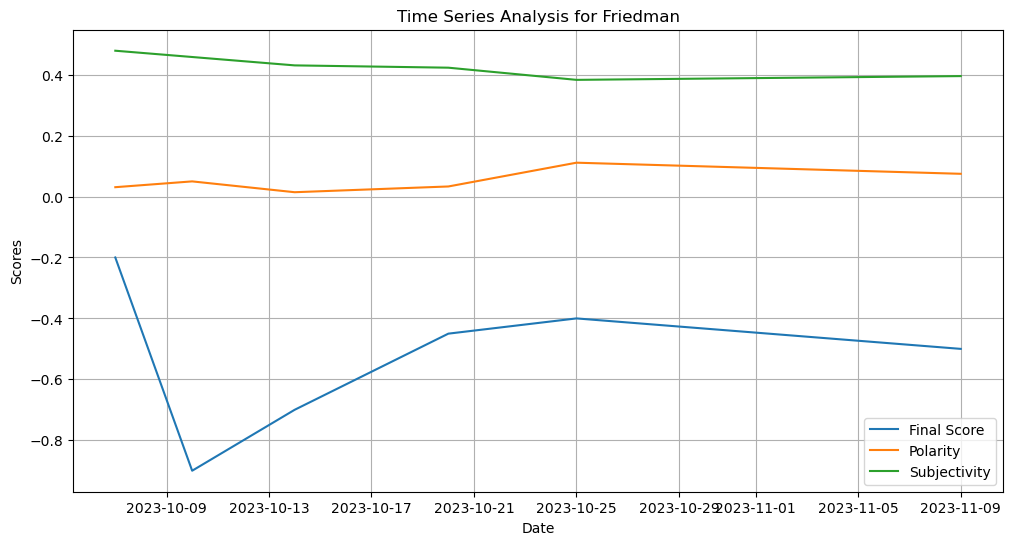

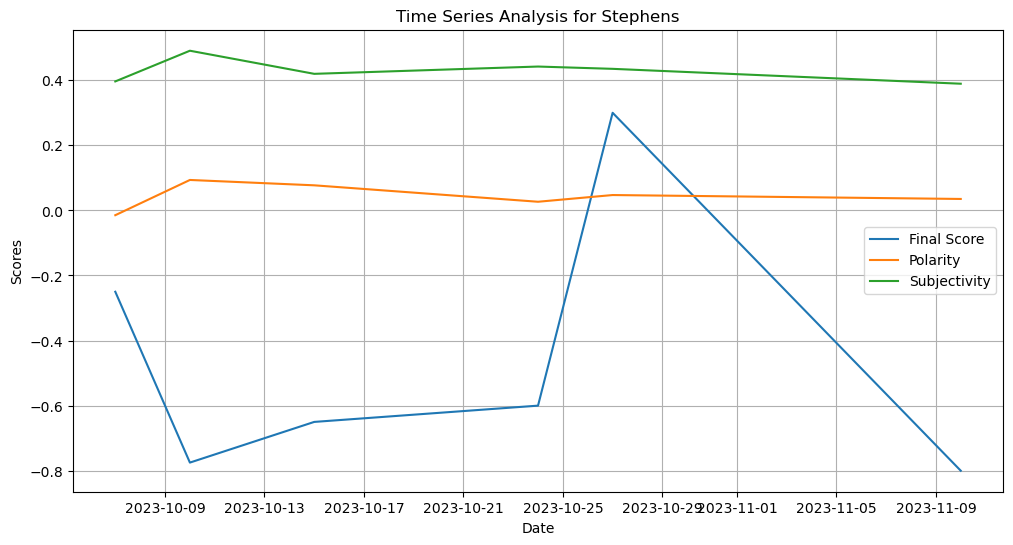

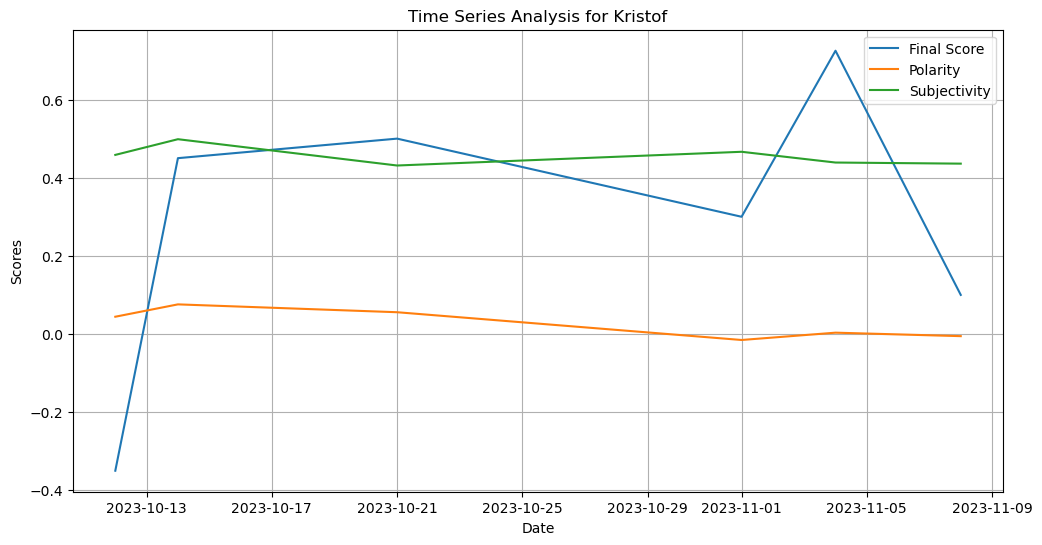

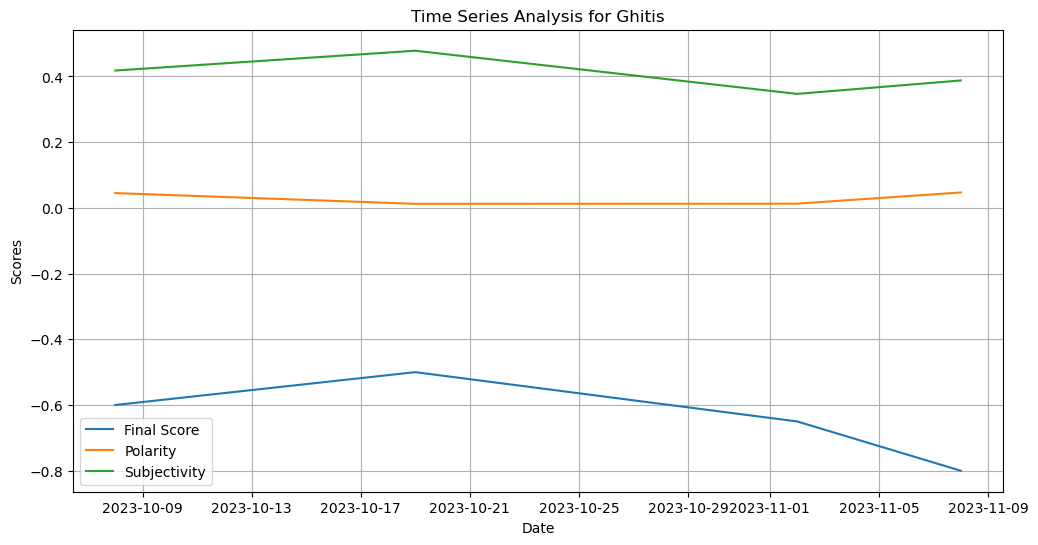

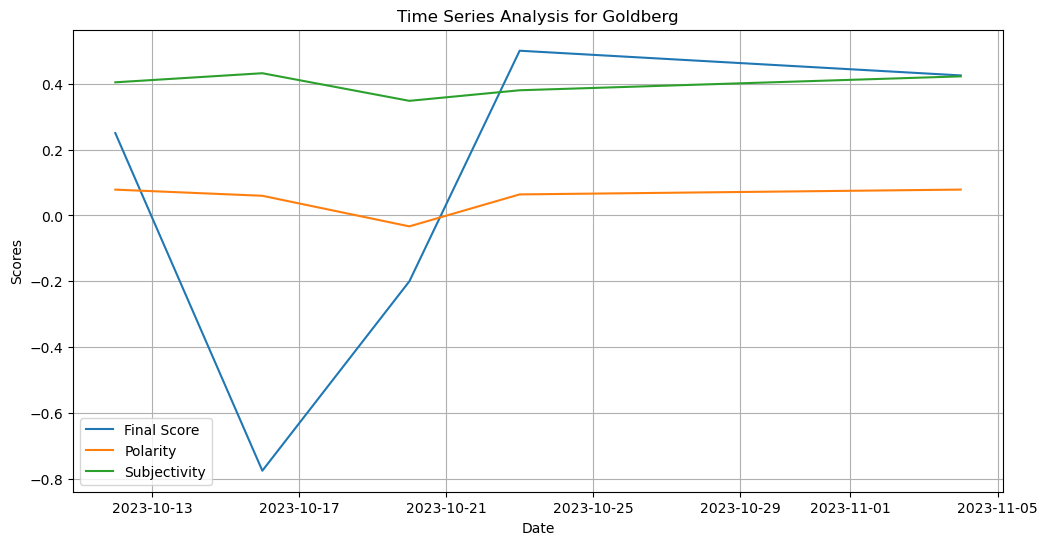

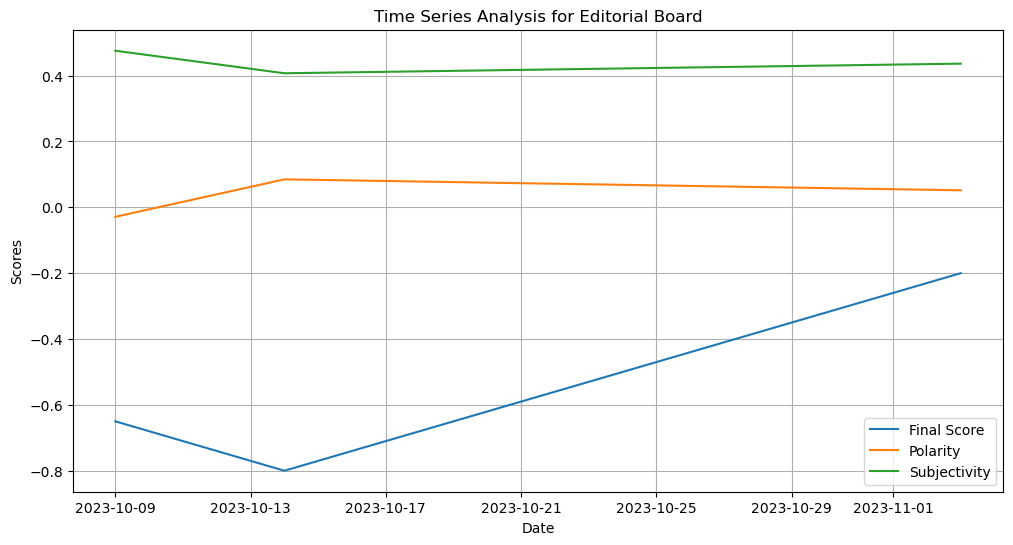

In [23]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# List of authors to analyze
top5_authors_to_analyze = ['Friedman', 'Stephens', 'Kristof', 'Ghitis', 'Goldberg', 'Editorial Board']  # replace with actual author names

# Plotting time series for each author
for author in top5_authors_to_analyze:
    author_df = finished_df[finished_df['Author'] == author]

    plt.figure(figsize=(12, 6))
    plt.plot(author_df['Date'], author_df['Final Score'], label='Final Score')
    plt.plot(author_df['Date'], author_df['Polarity'], label='Polarity')
    plt.plot(author_df['Date'], author_df['Subjectivity'], label='Subjectivity')

    plt.title(f'Time Series Analysis for {author}')
    plt.xlabel('Date')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

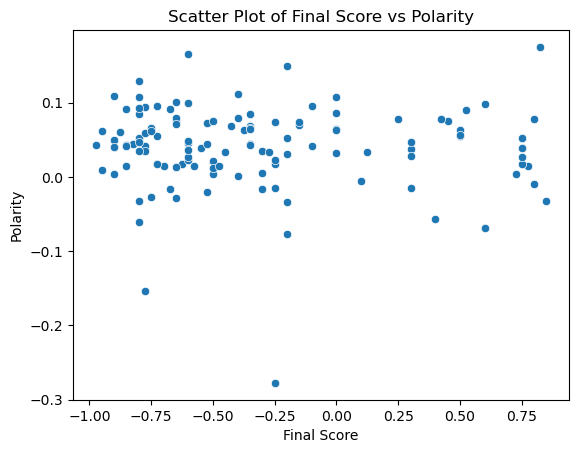

NameError: name 'stats' is not defined

In [24]:
sns.scatterplot(data=finished_df, x='Final Score', y='Polarity')
plt.title('Scatter Plot of Final Score vs Polarity')
plt.show()

# Calculating Pearson Correlation Coefficient
pearson_corr, p_value = stats.pearsonr(finished_df['Final Score'].dropna(), finished_df['Polarity'].dropna())
print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value}")

In [25]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'finished_df'
# Convert 'Date' to datetime and set as index (if not already done)
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')
finished_df.set_index('Date', inplace=True)

# Publications to analyze
publications = ['NYTimes', 'WSJ', 'CNN']

# Idea 1: Comparing Extremes
for publication in publications:
    pub_df = finished_df[finished_df['Source'] == publication]
    weekly_extremes = pub_df.resample('W')['Final Score'].agg(lambda x: x.nlargest(5).mean() - x.nsmallest(5).mean())

# Idea 2: Scoring System
def calculate_score(final_score):
    if -1.0 <= final_score <= -0.5 or 0.5 <= final_score <= 1.0:
        return 1
    return 0

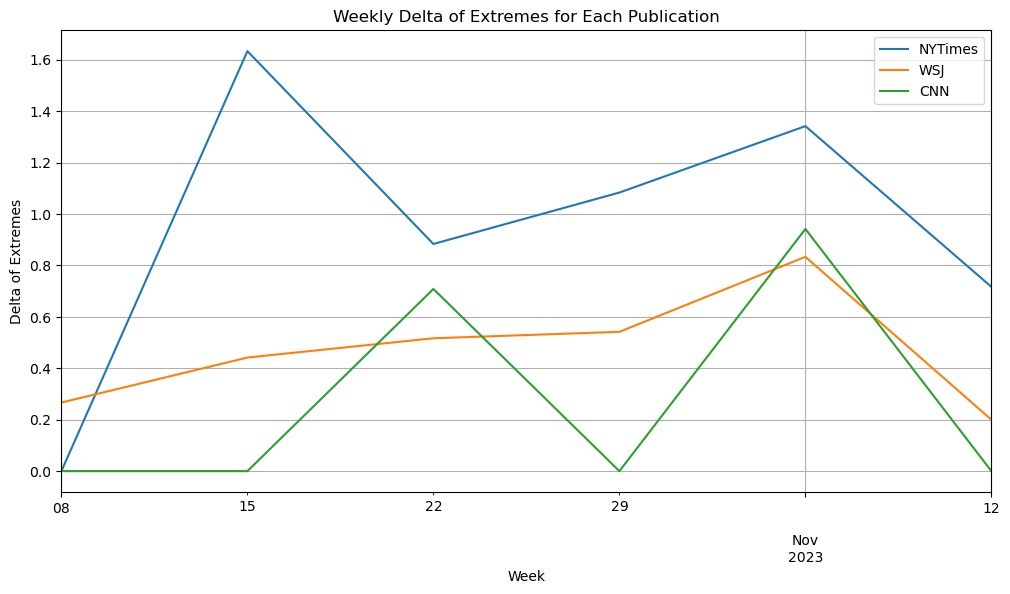

In [26]:
import matplotlib.pyplot as plt

# Visualization for Idea 1: Comparing Extremes
plt.figure(figsize=(12, 6))
for publication in publications:
    pub_df = finished_df[finished_df['Source'] == publication]
    weekly_extremes = pub_df.resample('W')['Final Score'].agg(lambda x: x.nlargest(3).mean() - x.nsmallest(3).mean())
    weekly_extremes.plot(label=publication)

plt.title('Weekly Delta of Extremes for Each Publication')
plt.xlabel('Week')
plt.ylabel('Delta of Extremes')
plt.legend()
plt.grid(True)
plt.show()



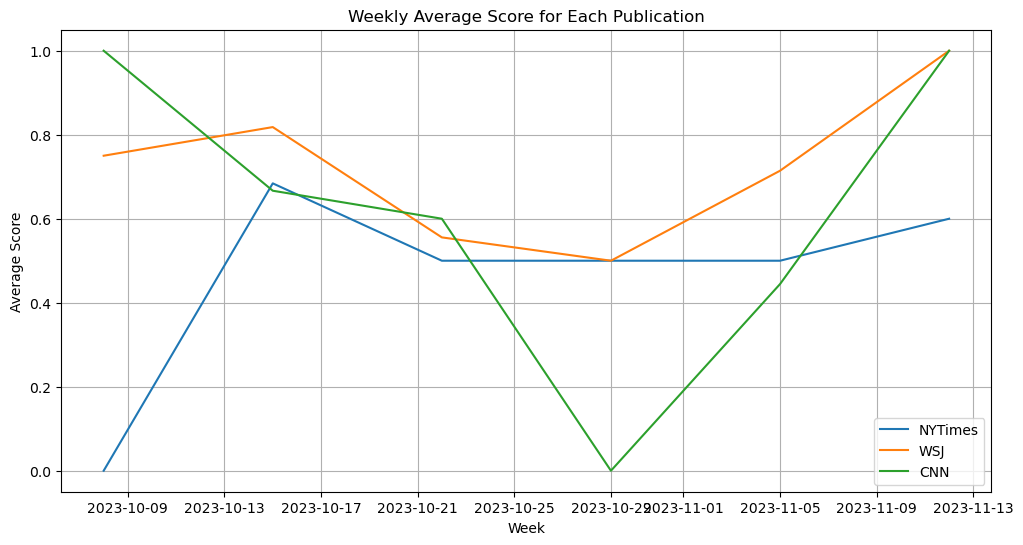

In [27]:
import matplotlib.pyplot as plt


# Assuming the 'Date' column is correctly set and 'finished_df' is your dataframe
# Define the scoring function
def calculate_score(final_score):
    if -1.0 <= final_score <= -0.5 or 0.5 <= final_score <= 1.0:
        return 1
    return 0

# Apply the scoring function
finished_df['Score'] = finished_df['Final Score'].apply(calculate_score)

# Reset index if 'Date' is set as index
finished_df.reset_index(inplace=True)

# Group by both 'Source' and 'Date', then calculate mean
weekly_scores = finished_df.groupby(['Source', pd.Grouper(freq='W', key='Date')])['Score'].mean()

# Visualization for Idea 2: Scoring System
plt.figure(figsize=(12, 6))
for publication in publications:
    # Retrieve scores for each publication
    pub_scores = weekly_scores[publication]
    plt.plot(pub_scores.index, pub_scores.values, label=publication)

plt.title('Weekly Average Score for Each Publication')
plt.xlabel('Week')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

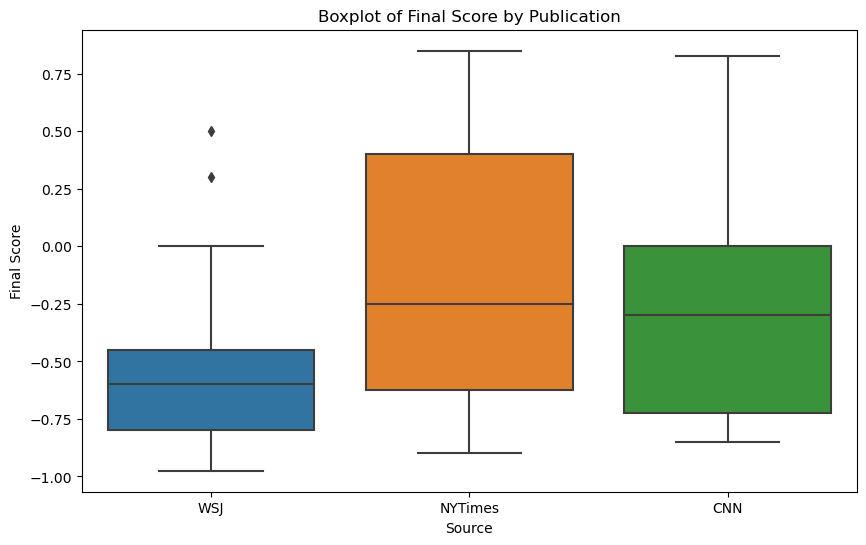

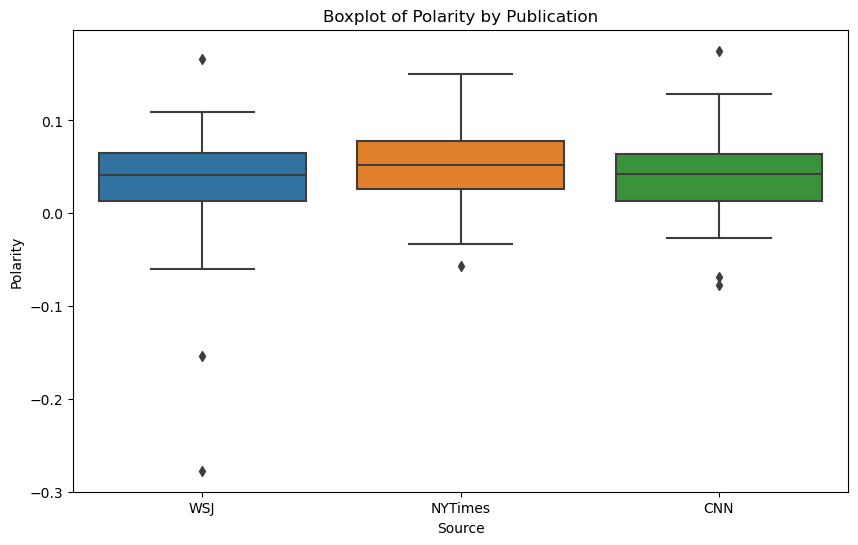

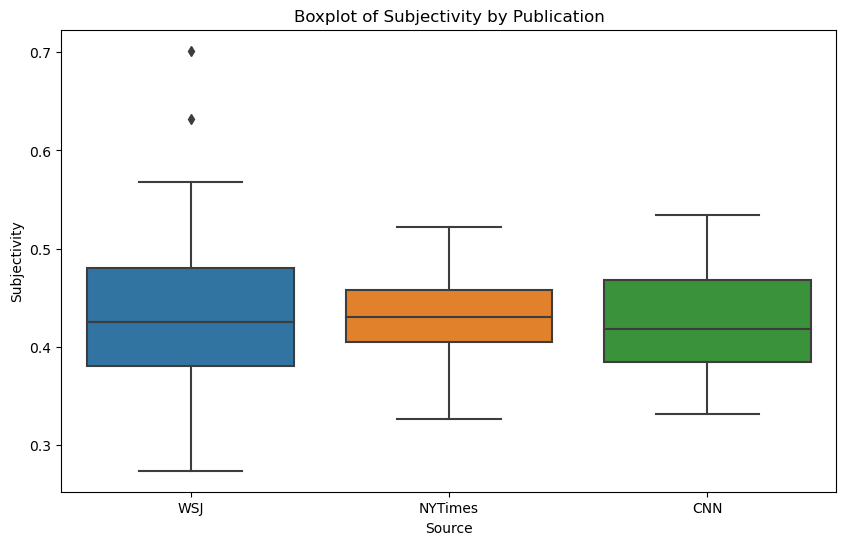

In [28]:
# Create a boxplot for 'Final Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Final Score', data=finished_df)
plt.title('Boxplot of Final Score by Publication')
plt.show()

# Create a boxplot for 'Polarity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Polarity', data=finished_df)
plt.title('Boxplot of Polarity by Publication')
plt.show()

# Assuming 'Bias' is a column in your dataframe
# Create a boxplot for 'Bias'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Subjectivity', data=finished_df)
plt.title('Boxplot of Subjectivity by Publication')
plt.show()

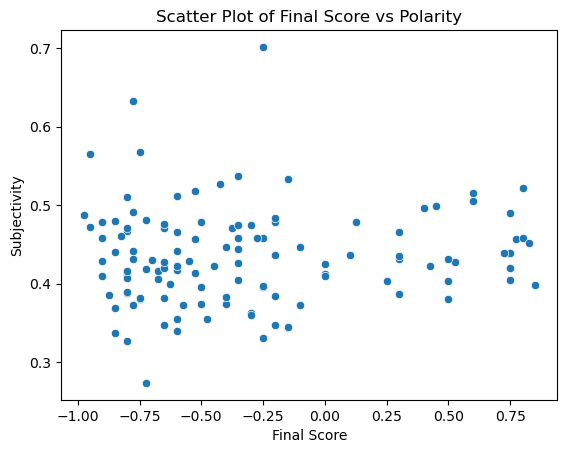

NameError: name 'stats' is not defined

In [29]:
sns.scatterplot(data=finished_df, x='Final Score', y='Subjectivity')
plt.title('Scatter Plot of Final Score vs Polarity')
plt.show()

# Calculating Pearson Correlation Coefficient
pearson_corr, p_value = stats.pearsonr(finished_df['Final Score'].dropna(), finished_df['Subjectivity'].dropna())
print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value}")

In [32]:

# Define thresholds
pro_israel_threshold = 0.2
pro_palestinian_threshold = -0.2

# Function to calculate diversity score
def calculate_diversity_score(finished_df):
    pro_israel_count = finished_df[finished_df['Final Score'] > pro_israel_threshold].shape[0]
    pro_palestinian_count = finished_df[finished_df['Final Score'] < pro_palestinian_threshold].shape[0]
    return pro_israel_count - pro_palestinian_count

# Calculate diversity score for each publication
diversity_by_publication = finished_df.groupby('Source').apply(calculate_diversity_score)

print("Diversity Score by Source:")
print(diversity_by_publication)

Diversity Score by Source:
Source
CNN        -8
NYTimes   -12
WSJ       -37
dtype: int64


In [36]:
pro_israel_threshold = -0.2  # Articles with 'Final Score' > this value
pro_palestinian_threshold = 0.2  # Articles with 'Final Score' < this value

# Counting articles
pro_israel_count = finished_df[finished_df['Final Score'] < pro_israel_threshold].shape[0]
pro_palestinian_count = finished_df[finished_df['Final Score'] > pro_palestinian_threshold].shape[0]

# Calculating the diversity score
diversity_score = pro_israel_count - pro_palestinian_count

print(f"Pro-Israel article count: {pro_israel_count}")
print(f"Pro-Palestinian article count: {pro_palestinian_count}")
print(f"Diversity Score: {diversity_score}")

Pro-Israel article count: 81
Pro-Palestinian article count: 24
Diversity Score: 57


In [37]:
finished_df['Week'] = finished_df['Date'].dt.isocalendar().week

# Calculate diversity score for each week
diversity_by_week = finished_df.groupby('Week').apply(calculate_diversity_score)

print("Diversity Score by Week:")
print(diversity_by_week)

Diversity Score by Week:
Week
40    -7
41   -15
42   -16
43    -6
44    -7
45   -11
dtype: int64


In [38]:
articles_per_publication = finished_df['Source'].value_counts()
print(articles_per_publication)

NYTimes    57
WSJ        44
CNN        21
Name: Source, dtype: int64


In [40]:
pro_israel_threshold = -0.2
pro_palestinian_threshold = 0.2

# Function to calculate normalized diversity score
def calculate_normalized_diversity_score(finished_df):
    total_articles = finished_df.shape[0]
    pro_israel_count = finished_df[finished_df['Final Score'] > pro_israel_threshold].shape[0]
    pro_palestinian_count = finished_df[finished_df['Final Score'] < pro_palestinian_threshold].shape[0]
    diversity_score = pro_israel_count - pro_palestinian_count
    # Normalize by total articles
    normalized_diversity_score = diversity_score / total_articles
    return normalized_diversity_score

# Calculate normalized diversity score for each publication
normalized_diversity_by_publication = finished_df.groupby('Source').apply(calculate_normalized_diversity_score)

print("Normalized Diversity Score by Publication:")
print(normalized_diversity_by_publication)

Normalized Diversity Score by Publication:
Source
CNN       -0.428571
NYTimes   -0.280702
WSJ       -0.840909
dtype: float64


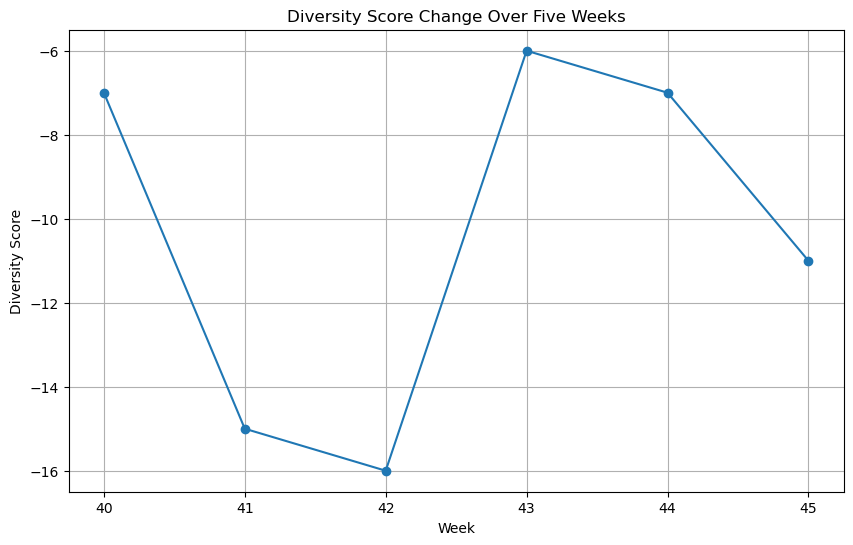

In [41]:
diversity_df = diversity_by_week.reset_index()
diversity_df.columns = ['Week', 'Diversity Score']

# Plotting
plt.figure(figsize=(10, 6))

# For a line plot
plt.plot(diversity_df['Week'], diversity_df['Diversity Score'], marker='o')
plt.title('Diversity Score Change Over Five Weeks')
plt.xlabel('Week')
plt.ylabel('Diversity Score')
plt.grid(True)

# Alternatively, for a bar plot
# plt.bar(diversity_df['Week'], diversity_df['Diversity Score'])
# plt.title('Diversity Score by Week')
# plt.xlabel('Week')
# plt.ylabel('Diversity Score')

plt.show()

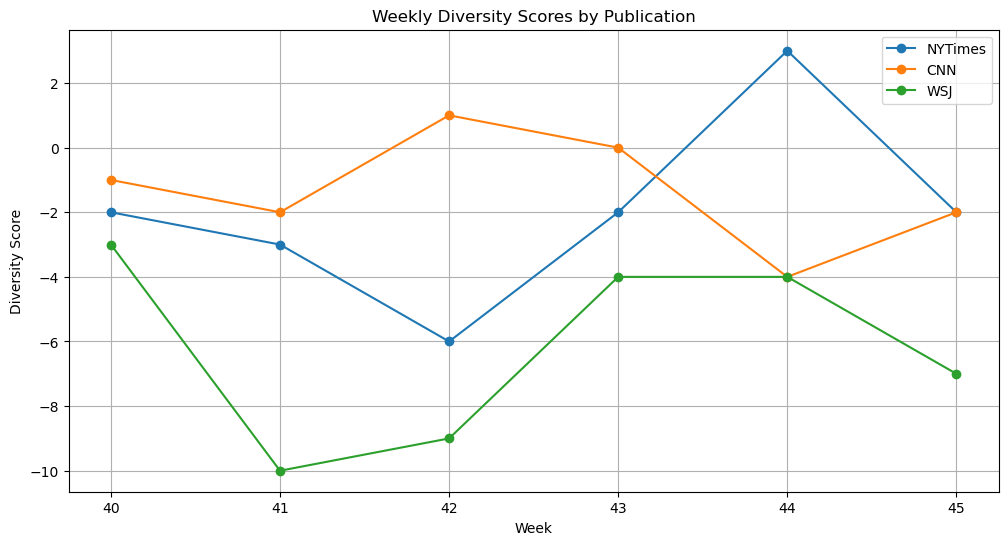

In [44]:
import pandas as pd

# Convert 'Date' to datetime and create a 'Week' column
finished_df['Date'] = pd.to_datetime(finished_df['Date'])
finished_df['Week'] = finished_df['Date'].dt.isocalendar().week

# Define thresholds
pro_israel_threshold = 0.2
pro_palestinian_threshold = -0.2

# Function to calculate diversity score
def calculate_diversity_score(group):
    pro_israel_count = (group['Final Score'] > pro_israel_threshold).sum()
    pro_palestinian_count = (group['Final Score'] < pro_palestinian_threshold).sum()
    return pro_israel_count - pro_palestinian_count

# Calculate diversity score for each publication per week
diversity_by_publication_week = finished_df.groupby(['Source', 'Week']).apply(calculate_diversity_score).unstack(level=0)

import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))
for publication in ['NYTimes', 'CNN', 'WSJ']:
    if publication in diversity_by_publication_week.columns:
        plt.plot(diversity_by_publication_week.index, diversity_by_publication_week[publication], marker='o', label=publication)

plt.title('Weekly Diversity Scores by Publication')
plt.xlabel('Week')
plt.ylabel('Diversity Score')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
authors_per_publication = finished_df['Author'].value_counts()
print(authors_per_publication)

Friedman          6
Stephens          6
Kristof           6
Goldberg          5
Ghitis            4
                 ..
Timoner           1
Thomas Warrick    1
Khan              1
Wisse             1
Guest             1
Name: Author, Length: 86, dtype: int64


In [46]:
finished_df.reset_index(inplace=True)

<AxesSubplot:title={'center':'Weekly Final Score'}, xlabel='Date'>

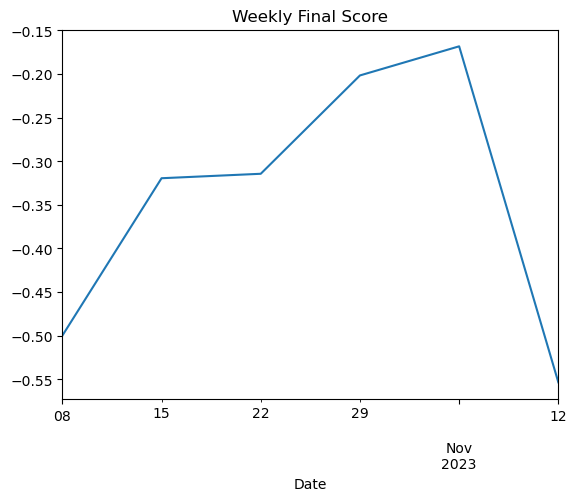

In [47]:
# Convert your date column to a datetime type if it's not already
finished_df['Date'] = pd.to_datetime(finished_df['Date'])

# Set the date as the index
finished_df.set_index('Date', inplace=True)

# Resample data by week and calculate mean 'Final Score'
weekly_final_score = finished_df['Final Score'].resample('W').mean()  # Or median(), depending on your preference

# Plot the time series
weekly_final_score.plot(kind='line', title='Weekly Final Score')

In [48]:
missing_values = finished_df.isnull().sum()
print(missing_values)

level_0          0
index            0
Article Link     0
Article          0
Polarity         0
Subjectivity     0
Source           0
Author           0
SS (Human)      96
SS (GPT)         1
SS (Claude)      1
Final Score      1
Words           38
Score            0
Week             0
dtype: int64


In [49]:
finished_df.head(10)

,level_0,index,Article Link,Article,Polarity,Subjectivity,Source,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words,Score,Week
Date,,,,,,,,,,,,,,,
2023-10-05,0,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,Ravid,NaN,-0.20,-0.1,-0.15,522.0,0,40
2023-10-07,1,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,Friedman,-0.20,-0.70,-0.2,-0.20,1977.0,0,40
2023-10-07,2,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,Stephens,NaN,-0.20,-0.3,-0.25,NaN,0,40
2023-10-08,3,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,Ghitis,-0.60,-0.75,-0.8,-0.60,NaN,1,40
2023-10-08,4,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,Kontorovich,NaN,-0.90,-0.8,-0.85,917.0,1,40
2023-10-08,5,120,https://www.wsj.com/articles/israel-faces-its-...,"Historical analogies are always tricky, but it...",0.009317,0.565459,WSJ,Troy,-0.95,-0.90,-0.5,-0.95,NaN,1,40
2023-10-08,6,118,https://www.wsj.com/articles/israels-opportuni...,Hamas’s surprise attack is a humanitarian horr...,0.101326,0.471174,WSJ,Pipes,NaN,-0.60,-0.7,-0.65,573.0,1,40
2023-10-08,7,52,https://www.nytimes.com/2023/10/08/opinion/int...,Saturday will be remembered as one of the most...,0.068129,0.404965,NYTimes,Meir,NaN,-0.50,-0.2,-0.35,NaN,0,40
2023-10-09,8,53,https://www.nytimes.com/2023/10/09/opinion/isr...,The brutal terrorist attack on Israel by Hamas...,-0.028837,0.475650,NYTimes,Editorial Board,NaN,-0.70,-0.6,-0.65,NaN,1,41


In [50]:
# Identifying rows with missing values in the 'Final' column
missing_final_rows = finished_df[finished_df['Final Score'].isnull()]

# Displaying the rows with missing values in 'Final'
print(missing_final_rows)


            level_0  index                                       Article Link  \
Date                                                                            
2023-10-10       15    114  m/articles/western-lecturing-and-israeli-restr...   

                                                      Article  Polarity  \
Date                                                                      
2023-10-10  “Too long have I lived among men who hate peac... -0.013679   

            Subjectivity Source   Author  SS (Human)  SS (GPT)  SS (Claude)  \
Date                                                                          
2023-10-10      0.424947    WSJ  Kaufman         NaN       NaN          NaN   

            Final Score  Words  Score  Week  
Date                                         
2023-10-10          NaN  921.0      0    41  


In [51]:
print(finished_df['Final Score'].dtype)

float64


In [52]:
finished_df['Final Score'] = pd.to_numeric(finished_df['Final Score'], errors='coerce')


In [53]:
missing_final_rows = finished_df[finished_df['Final Score'].isnull()]
print(missing_final_rows)

            level_0  index                                       Article Link  \
Date                                                                            
2023-10-10       15    114  m/articles/western-lecturing-and-israeli-restr...   

                                                      Article  Polarity  \
Date                                                                      
2023-10-10  “Too long have I lived among men who hate peac... -0.013679   

            Subjectivity Source   Author  SS (Human)  SS (GPT)  SS (Claude)  \
Date                                                                          
2023-10-10      0.424947    WSJ  Kaufman         NaN       NaN          NaN   

            Final Score  Words  Score  Week  
Date                                         
2023-10-10          NaN  921.0      0    41  


In [54]:
cleaned_df = finished_df.dropna(subset=['Final Score'])

# Check the shape of the DataFrame before and after to confirm the removal
print("Before removal:", cleaned_df.shape)
print("After removal:", cleaned_df.shape)

Before removal: (121, 15)
After removal: (121, 15)


In [55]:
cleaned_df.head()

,level_0,index,Article Link,Article,Polarity,Subjectivity,Source,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words,Score,Week
Date,,,,,,,,,,,,,,,
2023-10-05,0,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,Ravid,NaN,-0.20,-0.1,-0.15,522.0,0,40
2023-10-07,1,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,Friedman,-0.2,-0.70,-0.2,-0.20,1977.0,0,40
2023-10-07,2,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,Stephens,NaN,-0.20,-0.3,-0.25,NaN,0,40
2023-10-08,3,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,Ghitis,-0.6,-0.75,-0.8,-0.60,NaN,1,40
2023-10-08,4,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,Kontorovich,NaN,-0.90,-0.8,-0.85,917.0,1,40


In [56]:
print(cleaned_df['Words'].to_string())

Date
2023-10-05     522.0
2023-10-07    1977.0
2023-10-07       NaN
2023-10-08       NaN
2023-10-08     917.0
2023-10-08       NaN
2023-10-08     573.0
2023-10-08       NaN
2023-10-09       NaN
2023-10-09     679.0
2023-10-09       NaN
2023-10-09     890.0
2023-10-10     509.0
2023-10-10    1714.0
2023-10-10     852.0
2023-10-11     878.0
2023-10-11     407.0
2023-10-11     974.0
2023-10-12     930.0
2023-10-12       NaN
2023-10-12     882.0
2023-10-12       NaN
2023-10-12    2661.0
2023-10-12     612.0
2023-10-13     982.0
2023-10-13     499.0
2023-10-13     539.0
2023-10-13     851.0
2023-10-13     830.0
2023-10-14       NaN
2023-10-14       NaN
2023-10-14       NaN
2023-10-14    1363.0
2023-10-14       NaN
2023-10-15     911.0
2023-10-15     909.0
2023-10-15       NaN
2023-10-15     795.0
2023-10-15       NaN
2023-10-15     930.0
2023-10-16     820.0
2023-10-16     572.0
2023-10-16     939.0
2023-10-16       NaN
2023-10-17    1272.0
2023-10-17    1174.0
2023-10-17       NaN
2023-10-

In [57]:
# Calculate the average word length for each publication
average_words_per_publication = cleaned_df.groupby('Source')['Words'].mean()

# Fill NaNs in 'Words' column with the average word length of the corresponding publication
cleaned_df['Words'] = cleaned_df.apply(
    lambda row: average_words_per_publication[row['Source']] if pd.isna(row['Words']) else row['Words'], 
    axis=1
)

# Display the first few rows to confirm the changes
cleaned_df.head()

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_4219/2651022091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Words'] = cleaned_df.apply(


,level_0,index,Article Link,Article,Polarity,Subjectivity,Source,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words,Score,Week
Date,,,,,,,,,,,,,,,
2023-10-05,0,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,Ravid,NaN,-0.20,-0.1,-0.15,522.000000,0,40
2023-10-07,1,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,Friedman,-0.2,-0.70,-0.2,-0.20,1977.000000,0,40
2023-10-07,2,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,Stephens,NaN,-0.20,-0.3,-0.25,1263.636364,0,40
2023-10-08,3,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,Ghitis,-0.6,-0.75,-0.8,-0.60,964.400000,1,40
2023-10-08,4,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,Kontorovich,NaN,-0.90,-0.8,-0.85,917.000000,1,40


In [58]:
cleaned_df.head(10)

,level_0,index,Article Link,Article,Polarity,Subjectivity,Source,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words,Score,Week
Date,,,,,,,,,,,,,,,
2023-10-05,0,121,https://www.wsj.com/articles/fifty-years-since...,"Yom Kippur, the holiest day of the Jewish year...",0.070495,0.345045,WSJ,Ravid,NaN,-0.20,-0.1,-0.15,522.000000,0,40
2023-10-07,1,5,https://www.nytimes.com/2023/10/07/opinion/isr...,When I need the most accurate analysis about I...,0.030785,0.478788,NYTimes,Friedman,-0.20,-0.70,-0.2,-0.20,1977.000000,0,40
2023-10-07,2,51,https://www.nytimes.com/2023/10/07/opinion/gaz...,It’s easy to note the parallels between Hamas’...,-0.014695,0.396444,NYTimes,Stephens,NaN,-0.20,-0.3,-0.25,1263.636364,0,40
2023-10-08,3,71,https://www.cnn.com/2023/10/07/opinions/hamas-...,Millions of Israelis were jolted awake on Satu...,0.045020,0.417948,CNN,Ghitis,-0.60,-0.75,-0.8,-0.60,964.400000,1,40
2023-10-08,4,119,https://www.wsj.com/articles/this-is-an-irania...,As Jews celebrated a festive holiday on Saturd...,0.014383,0.440605,WSJ,Kontorovich,NaN,-0.90,-0.8,-0.85,917.000000,1,40
2023-10-08,5,120,https://www.wsj.com/articles/israel-faces-its-...,"Historical analogies are always tricky, but it...",0.009317,0.565459,WSJ,Troy,-0.95,-0.90,-0.5,-0.95,717.350000,1,40
2023-10-08,6,118,https://www.wsj.com/articles/israels-opportuni...,Hamas’s surprise attack is a humanitarian horr...,0.101326,0.471174,WSJ,Pipes,NaN,-0.60,-0.7,-0.65,573.000000,1,40
2023-10-08,7,52,https://www.nytimes.com/2023/10/08/opinion/int...,Saturday will be remembered as one of the most...,0.068129,0.404965,NYTimes,Meir,NaN,-0.50,-0.2,-0.35,1263.636364,0,40
2023-10-09,8,53,https://www.nytimes.com/2023/10/09/opinion/isr...,The brutal terrorist attack on Israel by Hamas...,-0.028837,0.475650,NYTimes,Editorial Board,NaN,-0.70,-0.6,-0.65,1263.636364,1,41


In [59]:
missing_values = cleaned_df.isnull().sum()
print(missing_values)

level_0          0
index            0
Article Link     0
Article          0
Polarity         0
Subjectivity     0
Source           0
Author           0
SS (Human)      95
SS (GPT)         0
SS (Claude)      0
Final Score      0
Words            0
Score            0
Week             0
dtype: int64


In [60]:
preprocessing_df = cleaned_df.drop(['SS (Human)', 'SS (GPT)', 'SS (Claude)'], axis=1)

In [61]:
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame with a 'Source' column
one_hot_encoded_df = pd.get_dummies(preprocessing_df, columns=['Source'])

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a pandas DataFrame `cleaned_df` with an 'Article' column containing the text
articles = preprocessing_df['Article']

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=3000,  # You can limit the number of features to keep
    ngram_range=(1, 10),  # Consider both single words and bi-grams to capture more context
    stop_words='english',  # Remove common 'stop words' in English
    max_df=0.2,  # Ignore terms that appear in more than 70% of the documents
    min_df=10  # Only consider terms that appear in at least 5 documents
)

# Fit the vectorizer on the text data and transform the text data into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(articles)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming preprocessing_df['Final Score'] contains continuous values for regression
y = preprocessing_df['Final Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model using an appropriate regression metric, such as Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE: {mse}")

Model MSE: 0.3420983775


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming preprocessing_df['Final Score'] is your continuous target variable
y = preprocessing_df['Final Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Model MSE: {mse}")
print(f"Model RMSE: {rmse}")
print(f"Model MAE: {mae}")
print(f"Model R-squared: {r2}")

Model MSE: 0.34134798999999993
Model RMSE: 0.5842499379546393
Model MAE: 0.46062
Model R-squared: -0.022134622525122882


In [65]:
import gensim
from gensim.utils import simple_preprocess

# Assuming 'Article' column contains the text
# Tokenize and preprocess the text
tokenized_articles = [simple_preprocess(article) for article in cleaned_df['Article']]

In [66]:
from gensim.models import Word2Vec

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_articles, vector_size=10, window=3, min_count=3, workers=4)

In [67]:
import numpy as np

def article_to_avg_vector(article, model):
    words = [word for word in simple_preprocess(article) if word in model.wv]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    else:
        return []

article_vectors = np.array([article_to_avg_vector(article, word2vec_model) for article in cleaned_df['Article']])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming preprocessing_df['Final Score'] is your continuous target variable
y = preprocessing_df['Final Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(article_vectors, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Model MSE: {mse}")
print(f"Model RMSE: {rmse}")
print(f"Model MAE: {mae}")
print(f"Model R-squared: {r2}")

Model MSE: 0.35317176999999994
Model RMSE: 0.5942825674710642
Model MAE: 0.47964000000000007
Model R-squared: -0.0575398256057682


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming preprocessing_df['Final Score'] is your continuous target variable
y = preprocessing_df['Polarity'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(article_vectors, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Model MSE: {mse}")
print(f"Model RMSE: {rmse}")
print(f"Model MAE: {mae}")
print(f"Model R-squared: {r2}")

Model MSE: 0.0024102553167342946
Model RMSE: 0.04909435116929742
Model MAE: 0.03783181631305008
Model R-squared: -0.4166918813471159


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming preprocessing_df['Final Score'] is your continuous target variable
y = preprocessing_df['Subjectivity'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(article_vectors, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Model MSE: {mse}")
print(f"Model RMSE: {rmse}")
print(f"Model MAE: {mae}")
print(f"Model R-squared: {r2}")

Model MSE: 0.00253240218740373
Model RMSE: 0.05032297872149193
Model MAE: 0.039547837576104916
Model R-squared: 0.09000161902155379


In [71]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(gamma='auto')),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# Define the stacking ensemble model
stacking_regressor = StackingRegressor(
    estimators=estimators, 
    final_estimator=LinearRegression()
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(article_vectors, y, test_size=0.2, random_state=42)

# Train the stacking ensemble
stacking_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = stacking_regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Stacking Model MSE: {mse}")
print(f"Stacking Model RMSE: {rmse}")
print(f"Stacking Model R-squared: {r2}")

Stacking Model MSE: 0.0026528283039382035
Stacking Model RMSE: 0.05150561429531934
Stacking Model R-squared: 0.04672746153622809


In [77]:
numeric_cols = preprocessing_df.columns[(preprocessing_df.dtypes == 'float64') | (preprocessing_df.dtypes == 'int64')]

# Select only these columns for clustering
numeric_features_df = preprocessing_df[numeric_cols]

# Check the selected columns
print(numeric_features_df.head())

            level_0  index  Polarity  Subjectivity  Final Score        Words  \
Date                                                                           
2023-10-05        0    121  0.070495      0.345045        -0.15   522.000000   
2023-10-07        1      5  0.030785      0.478788        -0.20  1977.000000   
2023-10-07        2     51 -0.014695      0.396444        -0.25  1263.636364   
2023-10-08        3     71  0.045020      0.417948        -0.60   964.400000   
2023-10-08        4    119  0.014383      0.440605        -0.85   917.000000   

            Score  
Date               
2023-10-05      0  
2023-10-07      0  
2023-10-07      0  
2023-10-08      1  
2023-10-08      1  


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(numeric_features_df)


k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

numeric_features_df = numeric_features_df.copy()

# Now add the cluster labels
numeric_features_df['Cluster'] = clusters



In [80]:
cluster_means = numeric_features_df.groupby('Cluster').mean()
print(cluster_means)

           level_0      index  Polarity  Subjectivity  Final Score  \
Cluster                                                              
0        80.218750  51.750000  0.049637      0.400536    -0.726562   
1        38.527778  97.555556  0.025877      0.468234    -0.591667   
2        64.377358  39.603774  0.044448      0.432053     0.132075   

               Words     Score  
Cluster                         
0        1112.472159  1.000000  
1         738.663510  0.777778  
2        1149.711835  0.283019  


In [82]:
from sklearn.decomposition import PCA

# Choose the number of components (e.g., 2 for easy visualization)
pca = PCA(n_components=2)

# Apply PCA to the normalized features
pca_features = pca.fit_transform(normalized_features)

# Add the PCA components to your DataFrame
numeric_features_df['PCA1'] = pca_features[:, 0]
numeric_features_df['PCA2'] = pca_features[:, 1]

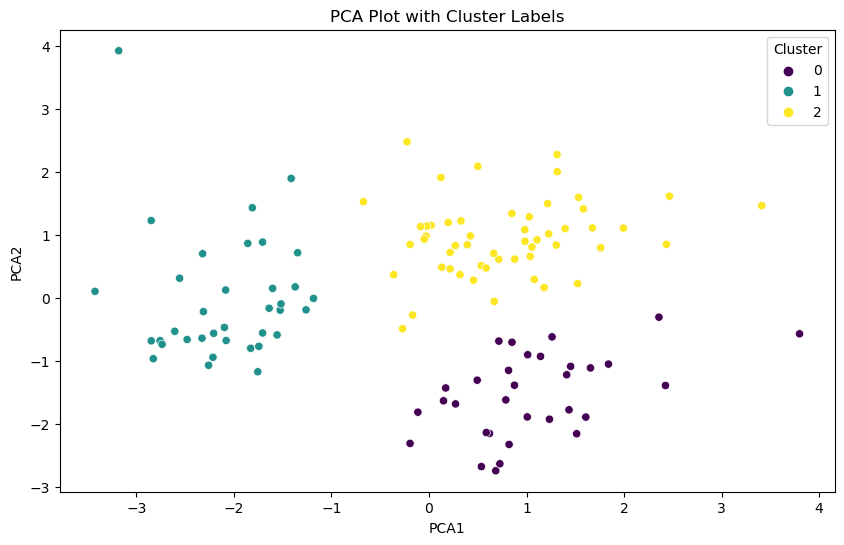

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=numeric_features_df, palette='viridis')
plt.title('PCA Plot with Cluster Labels')
plt.show()

In [86]:
feature_names = numeric_features_df.columns[:normalized_features.shape[1]]

In [88]:
# Assuming 'normalized_features' is the array used for PCA
pca = PCA(n_components=2)
pca.fit(normalized_features)

# The PCA loadings are in a matrix that is 8x2
loadings = pca.components_.T

# Extract feature names directly from the DataFrame used to create 'normalized_features'
# Assuming 'numeric_features_df' was used to create 'normalized_features' and has the correct features
feature_names = numeric_features_df.columns[:loadings.shape[0]]

# Create a DataFrame of loadings with the correct feature names
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2'], index=feature_names)
print(loadings_df)

                  PCA1      PCA2
level_0       0.333672 -0.175488
index        -0.553455 -0.237867
Polarity      0.160867 -0.238009
Subjectivity -0.262565  0.406836
Final Score   0.190648  0.532263
Words         0.435056  0.219847
Score        -0.091205 -0.494548
Cluster       0.503580 -0.338002


In [89]:
# Exclude 'Cluster' and 'index' from your features before profiling
features_to_profile = numeric_features_df.drop(['Cluster', 'index'], axis=1)

# Calculate the mean for all other features within each cluster
cluster_profiles = features_to_profile.groupby(numeric_features_df['Cluster']).mean()

# You can also look at the median, which is less sensitive to outliers
# cluster_profiles_median = features_to_profile.groupby(numeric_features_df['Cluster']).median()

print(cluster_profiles)

           level_0  Polarity  Subjectivity  Final Score        Words  \
Cluster                                                                
0        80.218750  0.049637      0.400536    -0.726562  1112.472159   
1        38.527778  0.025877      0.468234    -0.591667   738.663510   
2        64.377358  0.044448      0.432053     0.132075  1149.711835   

            Score      PCA1      PCA2  
Cluster                                
0        1.000000  1.061122 -1.541737  
1        0.777778 -2.082697 -0.026598  
2        0.283019  0.773985  0.948926  


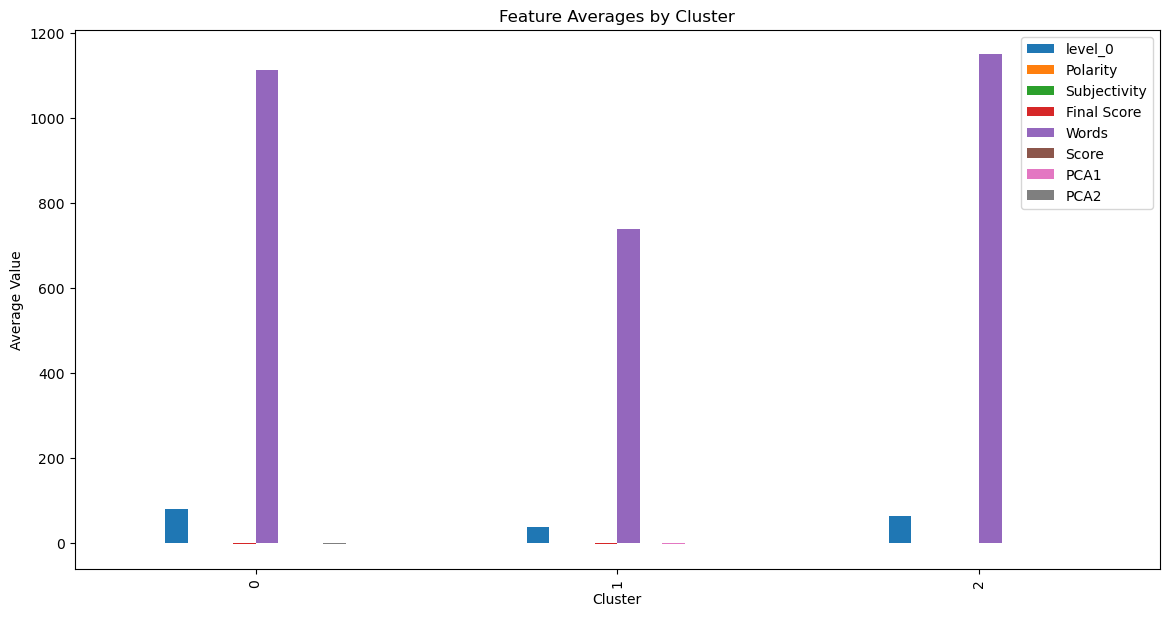

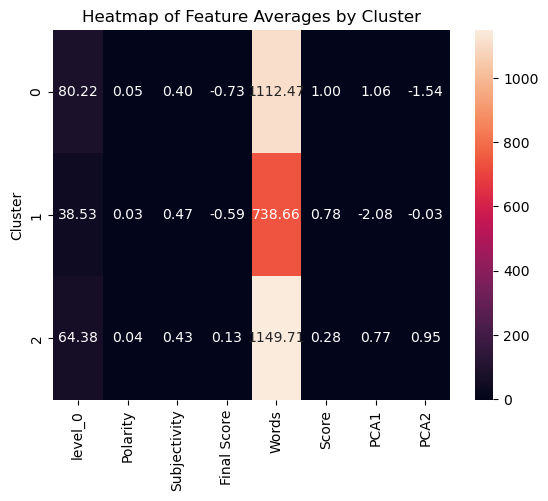

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart for cluster means
cluster_profiles.plot(kind='bar', figsize=(14, 7))
plt.title('Feature Averages by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.show()

# Heatmap of the cluster means can also be insightful
sns.heatmap(cluster_profiles, annot=True, fmt=".2f")
plt.title('Heatmap of Feature Averages by Cluster')
plt.show()

In [91]:
# Assuming 'Words' is the column with the word count and 'numeric_features_df' is your DataFrame
# Normalize features by word count
numeric_features_df['Polarity_per_100_words'] = numeric_features_df['Polarity'] / (numeric_features_df['Words'] / 100)
numeric_features_df['Subjectivity_per_100_words'] = numeric_features_df['Subjectivity'] / (numeric_features_df['Words'] / 100)
numeric_features_df['Final_Score_per_100_words'] = numeric_features_df['Final Score'] / (numeric_features_df['Words'] / 100)

In [92]:
# Select only the new normalized features for clustering
normalized_features_for_clustering = numeric_features_df[['Polarity_per_100_words', 'Subjectivity_per_100_words', 'Final_Score_per_100_words']]

# Normalize the new features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(normalized_features_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add the new cluster labels to your DataFrame
numeric_features_df['Normalized_Cluster'] = clusters

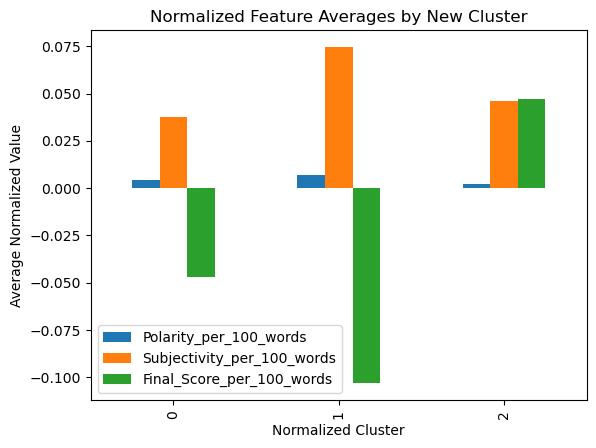

In [93]:
# Profile the new clusters
normalized_cluster_profiles = numeric_features_df.groupby('Normalized_Cluster').mean()

# Visualize the profiles
normalized_cluster_profiles[['Polarity_per_100_words', 'Subjectivity_per_100_words', 'Final_Score_per_100_words']].plot(kind='bar')
plt.title('Normalized Feature Averages by New Cluster')
plt.ylabel('Average Normalized Value')
plt.xlabel('Normalized Cluster')
plt.show()

In [97]:

# Add the source information based on the order you provided
numeric_features_df.iloc[:58, numeric_features_df.columns.get_loc('Source')] = 'NYTimes'
numeric_features_df.iloc[59:78, numeric_features_df.columns.get_loc('Source')] = 'CNN'  # Update indices as appropriate
numeric_features_df.iloc[79:, numeric_features_df.columns.get_loc('Source')] = 'WSJ' 



In [98]:
# Create a cross-tabulation of source by cluster
source_cluster_ct = pd.crosstab(numeric_features_df['Source'], numeric_features_df['Cluster'])

print(source_cluster_ct)

Cluster   0   1   2
Source             
CNN       4   5  12
NYTimes  10  27  21
WSJ      18   4  20


In [99]:
# Normalize the cross-tabulation by the number of articles in each source
source_cluster_ct_normalized = source_cluster_ct.div(source_cluster_ct.sum(axis=1), axis=0)

print(source_cluster_ct_normalized)

Cluster         0         1         2
Source                               
CNN      0.190476  0.238095  0.571429
NYTimes  0.172414  0.465517  0.362069
WSJ      0.428571  0.095238  0.476190


In [100]:
def preprocess_new_article(article_text):
    # Text cleaning
    cleaned_text = clean_text(article_text)  # Define a function for text cleaning

    # Feature extraction
    # Example: Extracting sentiment, subjectivity, etc.
    polarity = extract_polarity(cleaned_text)  # Define these functions based on your feature extraction process
    subjectivity = extract_subjectivity(cleaned_text)
    word_count = count_words(cleaned_text)

    # If you used TF-IDF or another vectorizer, apply it to the cleaned text
    # Example: tfidf_features = tfidf_vectorizer.transform([cleaned_text])

    # Combine all features into a single array (example)
    features = np.array([polarity, subjectivity, word_count])  # Add other features as needed

    # Normalize the features (if you used normalization in your model)
    normalized_features = scaler.transform(features.reshape(1, -1))  # Assuming 'scaler' is already fitted to your training data

    return normalized_features